## 게임회사 퍼블리셔(Publisher)별 매출표

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
data = pd.read_csv("../00_data/vgsales.csv", encoding="latin1")
data['Publisher'].value_counts()

Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Media Entertainment                1
New World Computing                1
Genterprise                        1
Rain Games                         1
UIG Entertainment                  1
Name: count, Length: 578, dtype: int64

In [4]:
top_publisher = data.groupby(by=['Publisher'])['Name'].count().sort_values(ascending=False).head(20)

top_publisher = pd.DataFrame(top_publisher).reset_index()
print(top_publisher)


                                 Publisher  Name
0                          Electronic Arts  1351
1                               Activision   975
2                       Namco Bandai Games   932
3                                  Ubisoft   921
4             Konami Digital Entertainment   832
5                                      THQ   715
6                                 Nintendo   703
7              Sony Computer Entertainment   683
8                                     Sega   639
9                     Take-Two Interactive   413
10                                  Capcom   381
11                                   Atari   363
12                              Tecmo Koei   338
13                             Square Enix   233
14  Warner Bros. Interactive Entertainment   232
15              Disney Interactive Studios   218
16                                 Unknown   203
17                       Eidos Interactive   198
18                            Midway Games   198
19                  

In [7]:
top_publisher = data.groupby(by=['Publisher'])['Name'].count().sort_values(ascending=False).iloc[:20].index
top_publisher

Index(['Electronic Arts', 'Activision', 'Namco Bandai Games', 'Ubisoft',
       'Konami Digital Entertainment', 'THQ', 'Nintendo',
       'Sony Computer Entertainment', 'Sega', 'Take-Two Interactive', 'Capcom',
       'Atari', 'Tecmo Koei', 'Square Enix',
       'Warner Bros. Interactive Entertainment', 'Disney Interactive Studios',
       'Unknown', 'Eidos Interactive', 'Midway Games', '505 Games'],
      dtype='object', name='Publisher')

## 퍼블리셔별 게임 출시 개수 TOP 20

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Electronic Arts'),
  Text(1, 0, 'Activision'),
  Text(2, 0, 'Namco Bandai Games'),
  Text(3, 0, 'Ubisoft'),
  Text(4, 0, 'Konami Digital Entertainment'),
  Text(5, 0, 'THQ'),
  Text(6, 0, 'Nintendo'),
  Text(7, 0, 'Sony Computer Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Take-Two Interactive'),
  Text(10, 0, 'Capcom'),
  Text(11, 0, 'Atari'),
  Text(12, 0, 'Tecmo Koei'),
  Text(13, 0, 'Square Enix'),
  Text(14, 0, 'Warner Bros. Interactive Entertainment'),
  Text(15, 0, 'Disney Interactive Studios'),
  Text(16, 0, 'Unknown'),
  Text(17, 0, 'Eidos Interactive'),
  Text(18, 0, 'Midway Games'),
  Text(19, 0, '505 Games')])

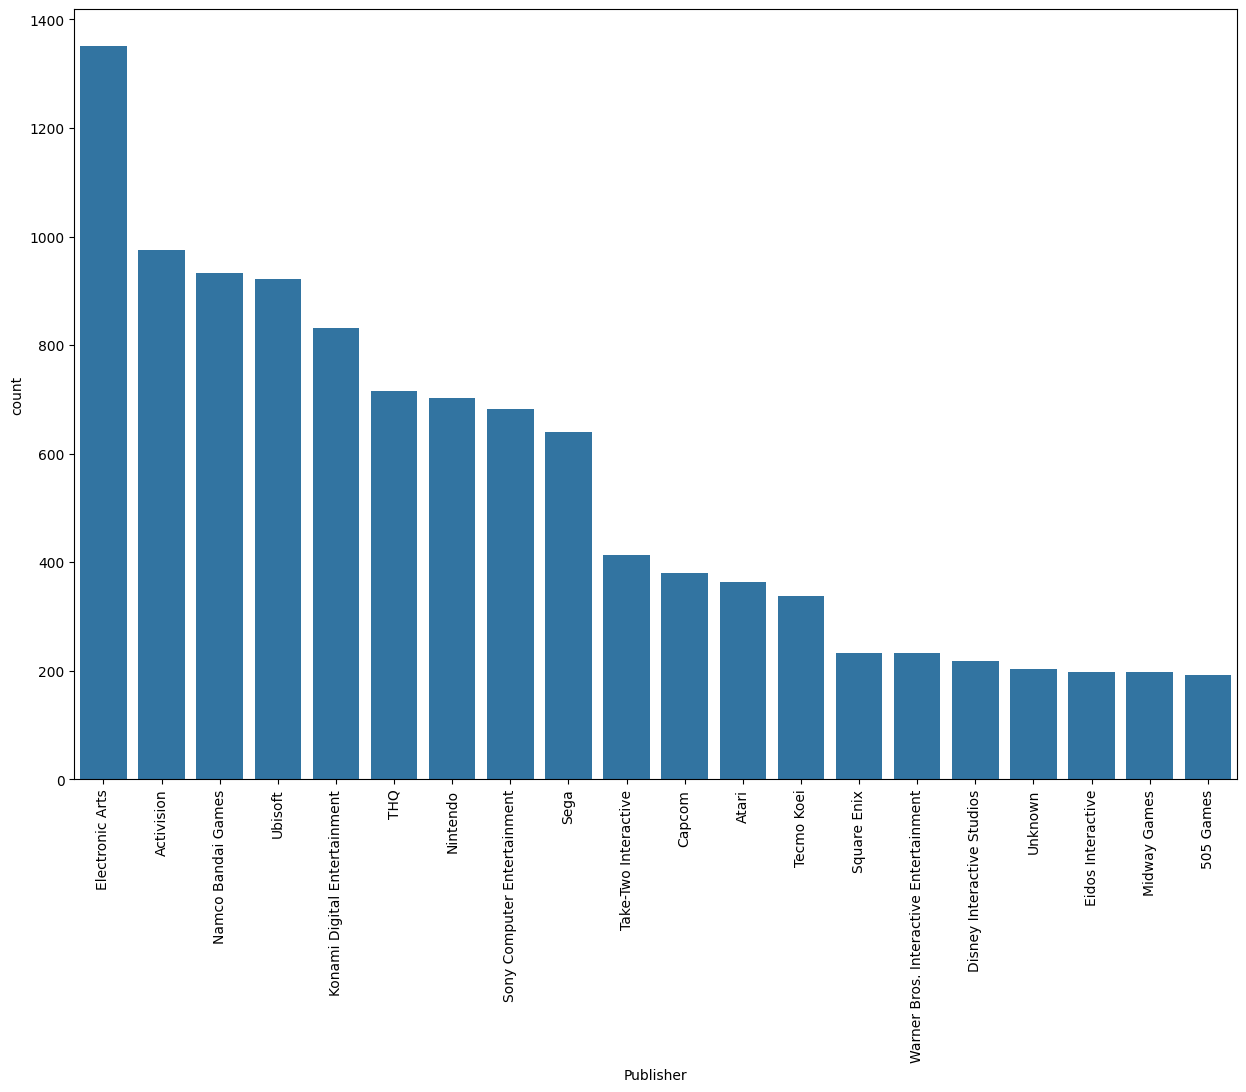

In [8]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher", data=data, order = data.groupby(by=['Publisher'])['Name'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)

## 퍼블리셔별 글로벌 총 매출액 순위 TOP 20

In [5]:
# NA_Sales,EU_Sales,JP_Sales,Other_Sales
sale_pbl = data[['Publisher', 'Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Nintendo'),
  Text(1, 0, 'Electronic Arts'),
  Text(2, 0, 'Activision'),
  Text(3, 0, 'Sony Computer Entertainment'),
  Text(4, 0, 'Ubisoft'),
  Text(5, 0, 'Take-Two Interactive'),
  Text(6, 0, 'THQ'),
  Text(7, 0, 'Konami Digital Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Namco Bandai Games'),
  Text(10, 0, 'Microsoft Game Studios'),
  Text(11, 0, 'Capcom'),
  Text(12, 0, 'Atari'),
  Text(13, 0, 'Warner Bros. Interactive Entertainment'),
  Text(14, 0, 'Square Enix'),
  Text(15, 0, 'Disney Interactive Studios'),
  Text(16, 0, 'Eidos Interactive'),
  Text(17, 0, 'LucasArts'),
  Text(18, 0, 'Bethesda Softworks'),
  Text(19, 0, 'Midway Games')])

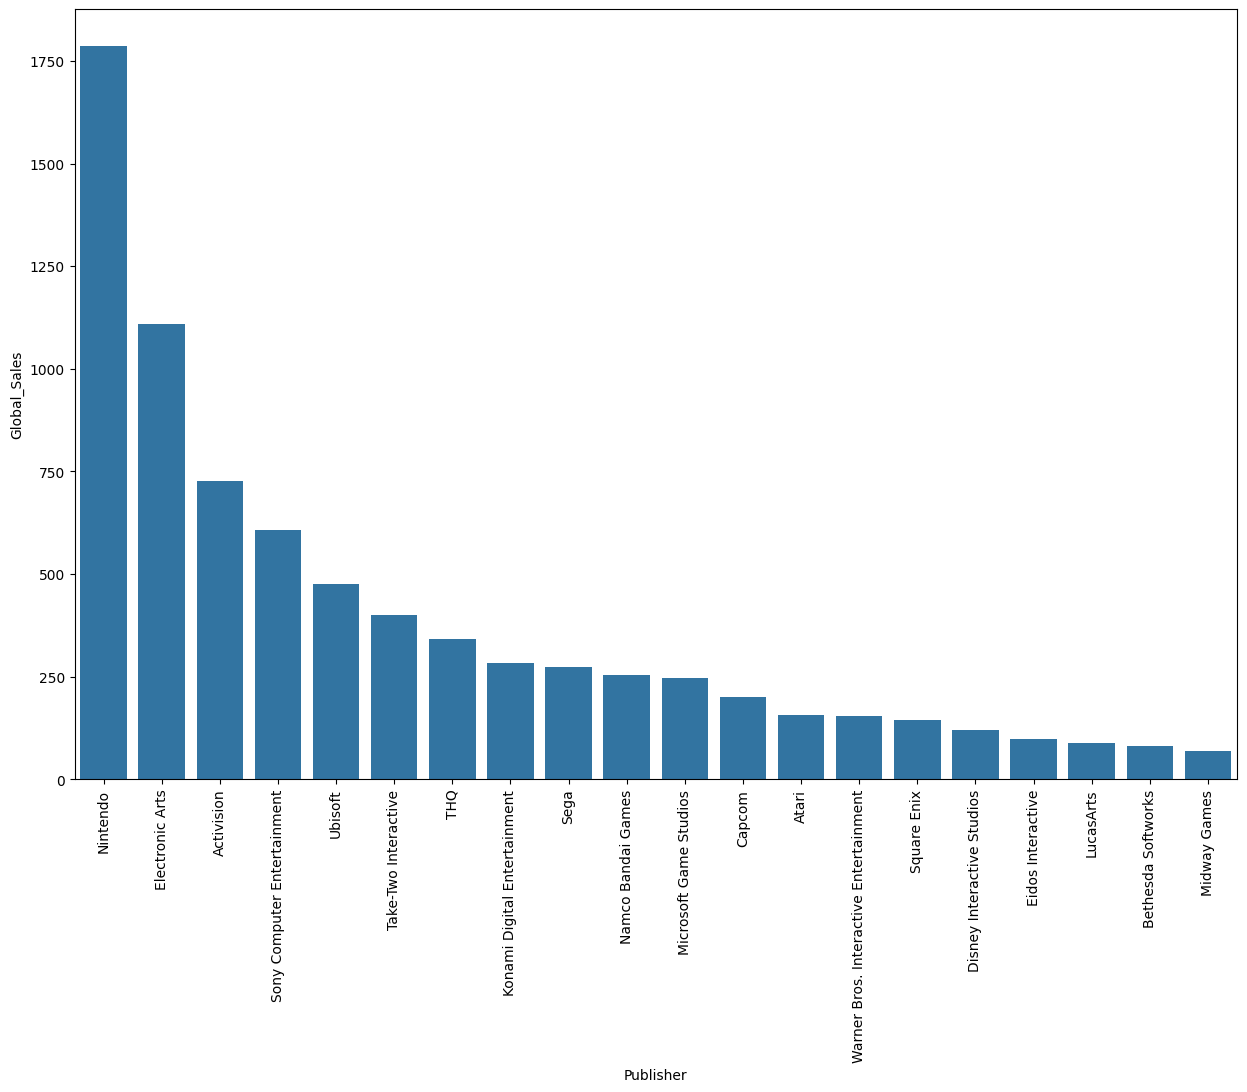

In [10]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=sale_pbl)
plt.xticks(rotation=90)

In [11]:
comp_publisher = data[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
comp_publisher.head()

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Nintendo,11.27,8.89,10.22,1.00,31.37


In [12]:
comp_publisher = comp_publisher.groupby(by=['Publisher']).sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)
comp_publisher = comp_publisher.head(20)
comp_publisher

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
359,Nintendo,816.87,418.74,455.42,95.33,1786.56
138,Electronic Arts,595.07,371.27,14.04,129.77,1110.32
21,Activision,429.70,215.53,6.54,75.34,727.46
456,Sony Computer Entertainment,265.22,187.72,74.10,80.45,607.50
525,Ubisoft,253.43,163.32,7.50,50.26,474.72
494,Take-Two Interactive,220.49,118.14,5.83,55.24,399.54
488,THQ,208.77,94.73,5.01,32.14,340.77
275,Konami Digital Entertainment,92.16,69.69,91.30,30.31,283.64
446,Sega,109.40,82.00,57.03,24.52,272.99
347,Namco Bandai Games,69.52,42.63,127.07,14.69,254.09


In [13]:
comp_publisher = pd.melt(comp_publisher, id_vars=['Publisher'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_publisher

,Publisher,Sale_Area,Sale_Price
0,Nintendo,NA_Sales,816.87
1,Electronic Arts,NA_Sales,595.07
2,Activision,NA_Sales,429.70
3,Sony Computer Entertainment,NA_Sales,265.22
4,Ubisoft,NA_Sales,253.43
...,...,...,...
75,Disney Interactive Studios,Other_Sales,13.18
76,Eidos Interactive,Other_Sales,8.02
77,LucasArts,Other_Sales,10.50
78,Bethesda Softworks,Other_Sales,10.16


## 퍼블리셔별 지역별 매출 순위 TOP 20

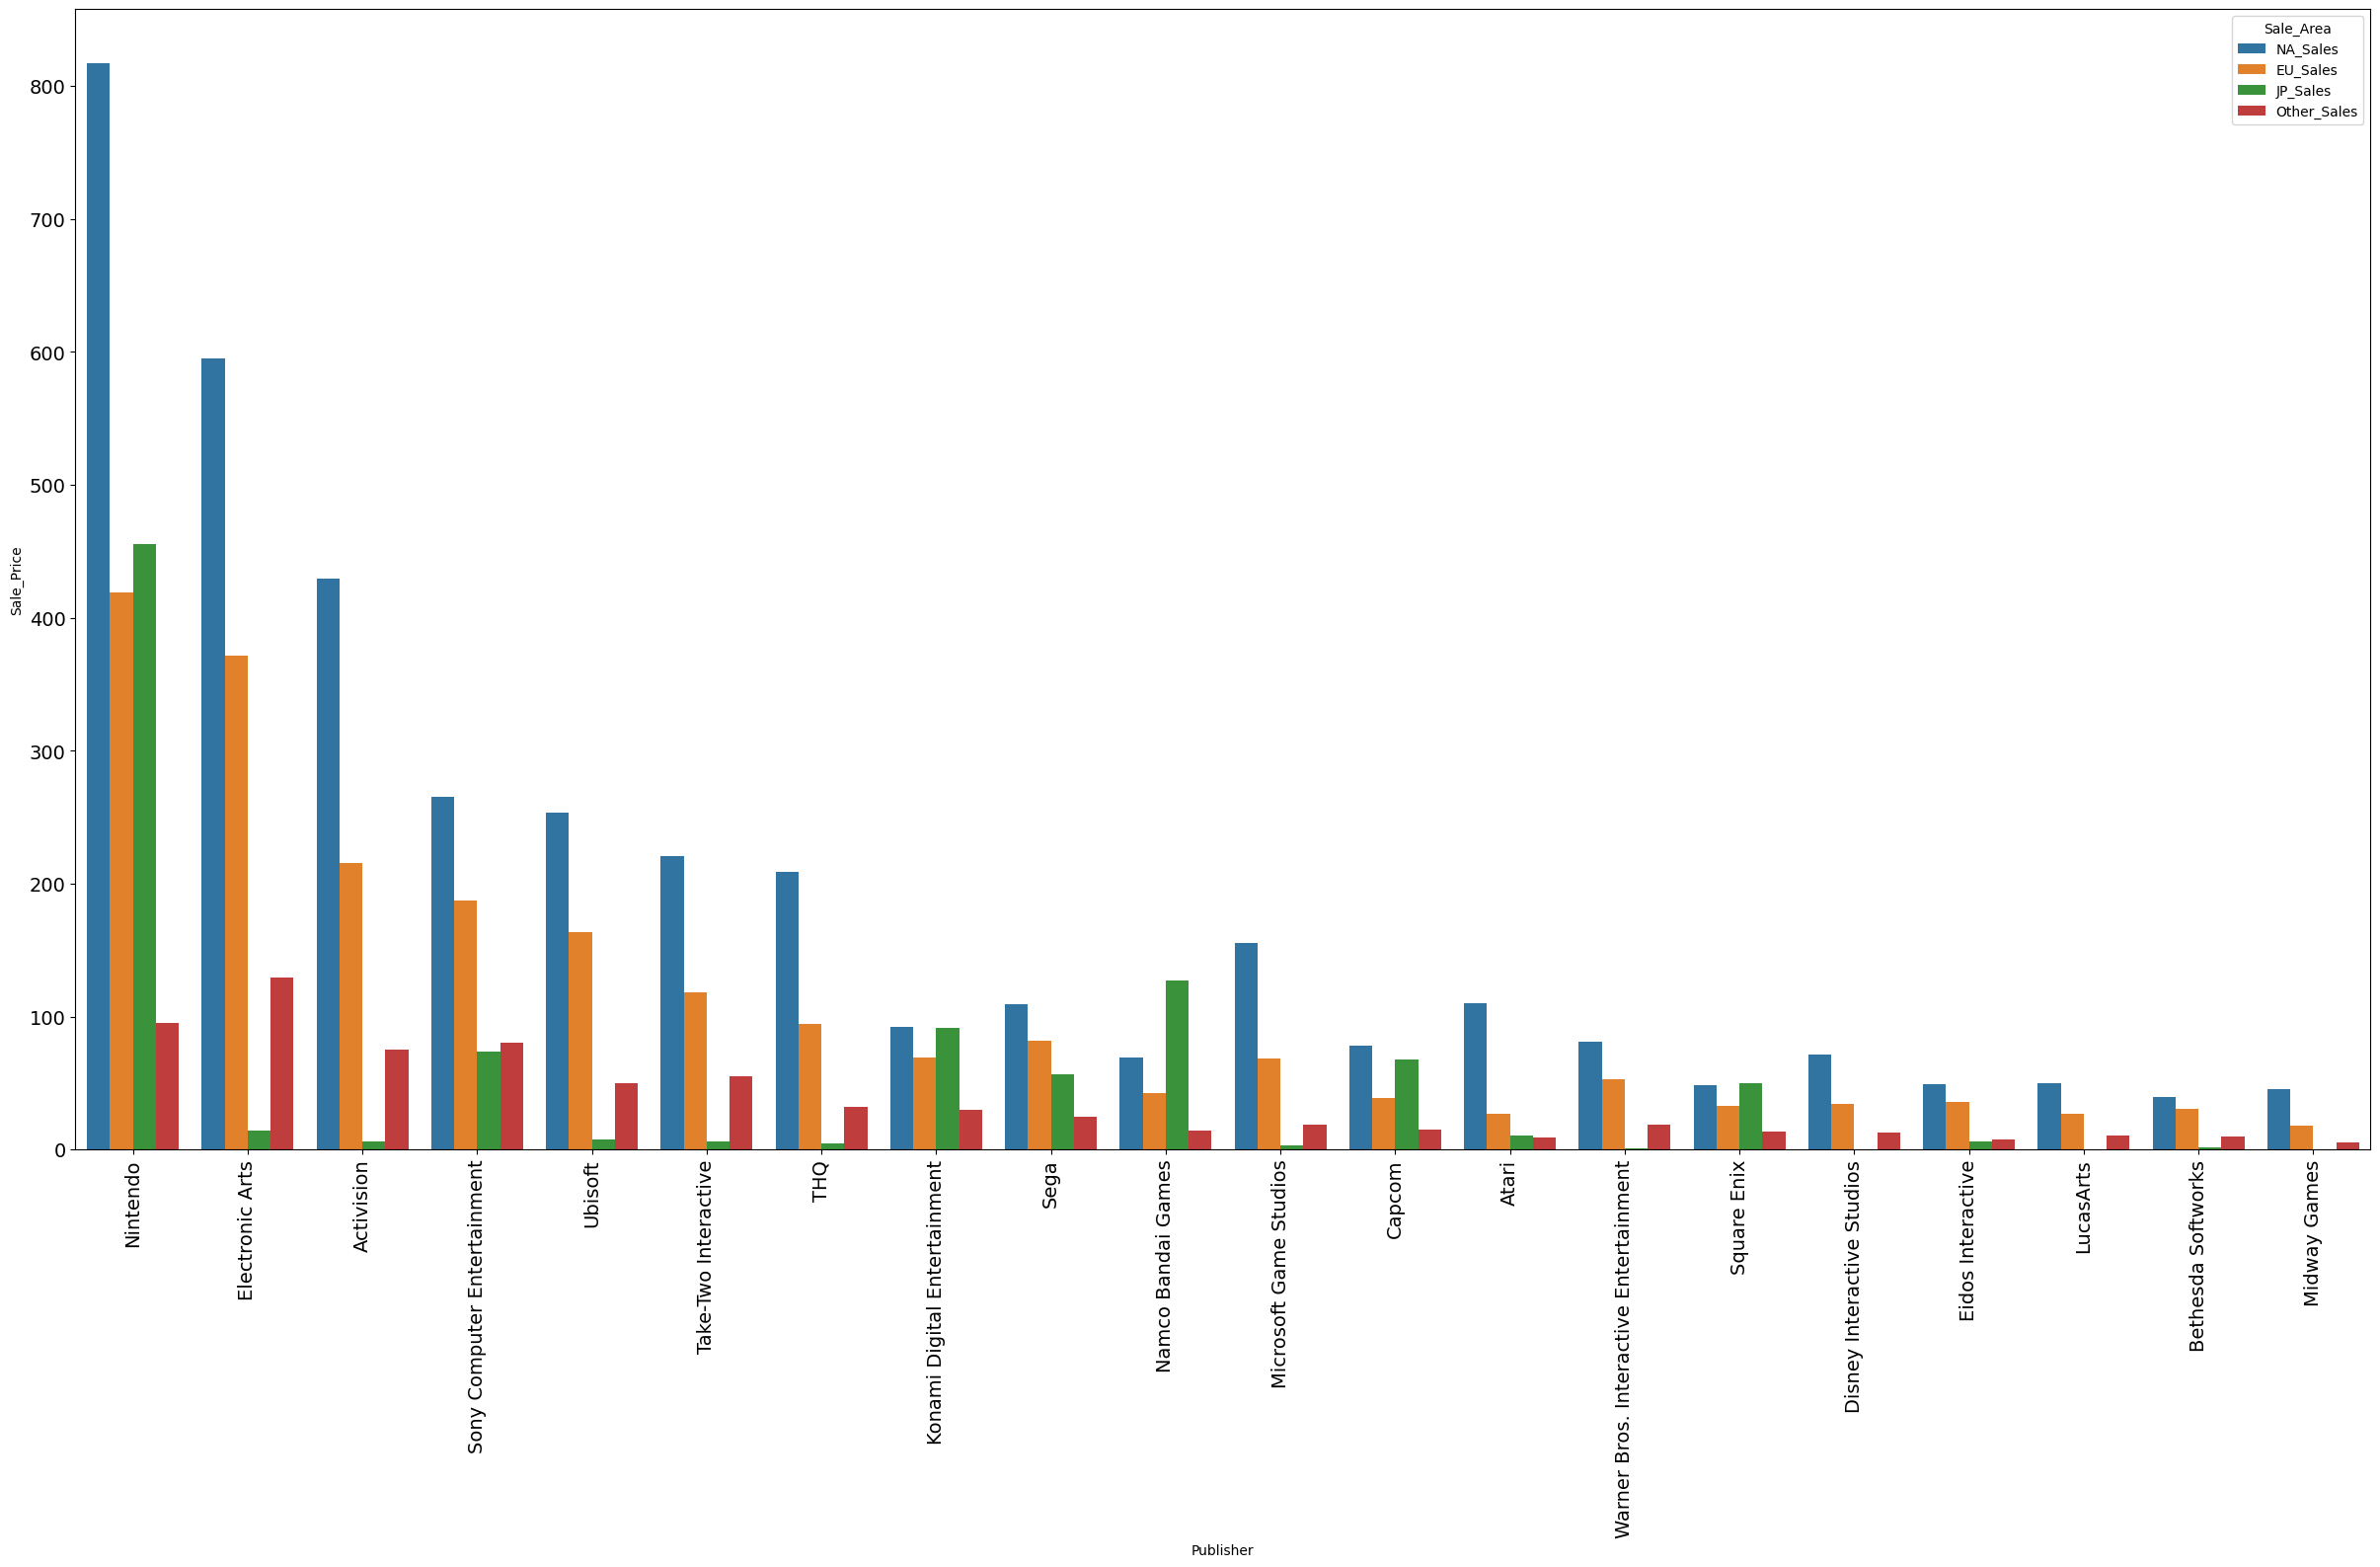

In [14]:
plt.figure(figsize=(30, 15))
sns.barplot(x='Publisher', y='Sale_Price', hue='Sale_Area', data=comp_publisher)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

In [15]:
data_pair = data.loc[:,["Publisher", "NA_Sales","EU_Sales", "Other_Sales","JP_Sales", "Global_Sales"]]
unique_data_pair = data_pair.drop_duplicates(subset=["Publisher"]).head(20)
unique_data_pair

,Publisher,NA_Sales,EU_Sales,Other_Sales,JP_Sales,Global_Sales
0,Nintendo,41.49,29.02,8.46,3.77,82.74
15,Microsoft Game Studios,14.97,4.94,1.67,0.24,21.82
16,Take-Two Interactive,7.01,9.27,4.14,0.97,21.40
28,Sony Computer Entertainment,6.85,5.09,1.16,1.87,14.98
29,Activision,9.03,4.28,1.32,0.13,14.76
60,Ubisoft,6.05,3.15,1.07,0.00,10.26
75,Bethesda Softworks,5.03,2.86,0.85,0.10,8.84
77,Electronic Arts,1.11,6.06,1.26,0.06,8.49
85,Sega,2.58,3.90,0.91,0.66,8.06
87,SquareSoft,2.28,1.72,0.23,3.63,7.86


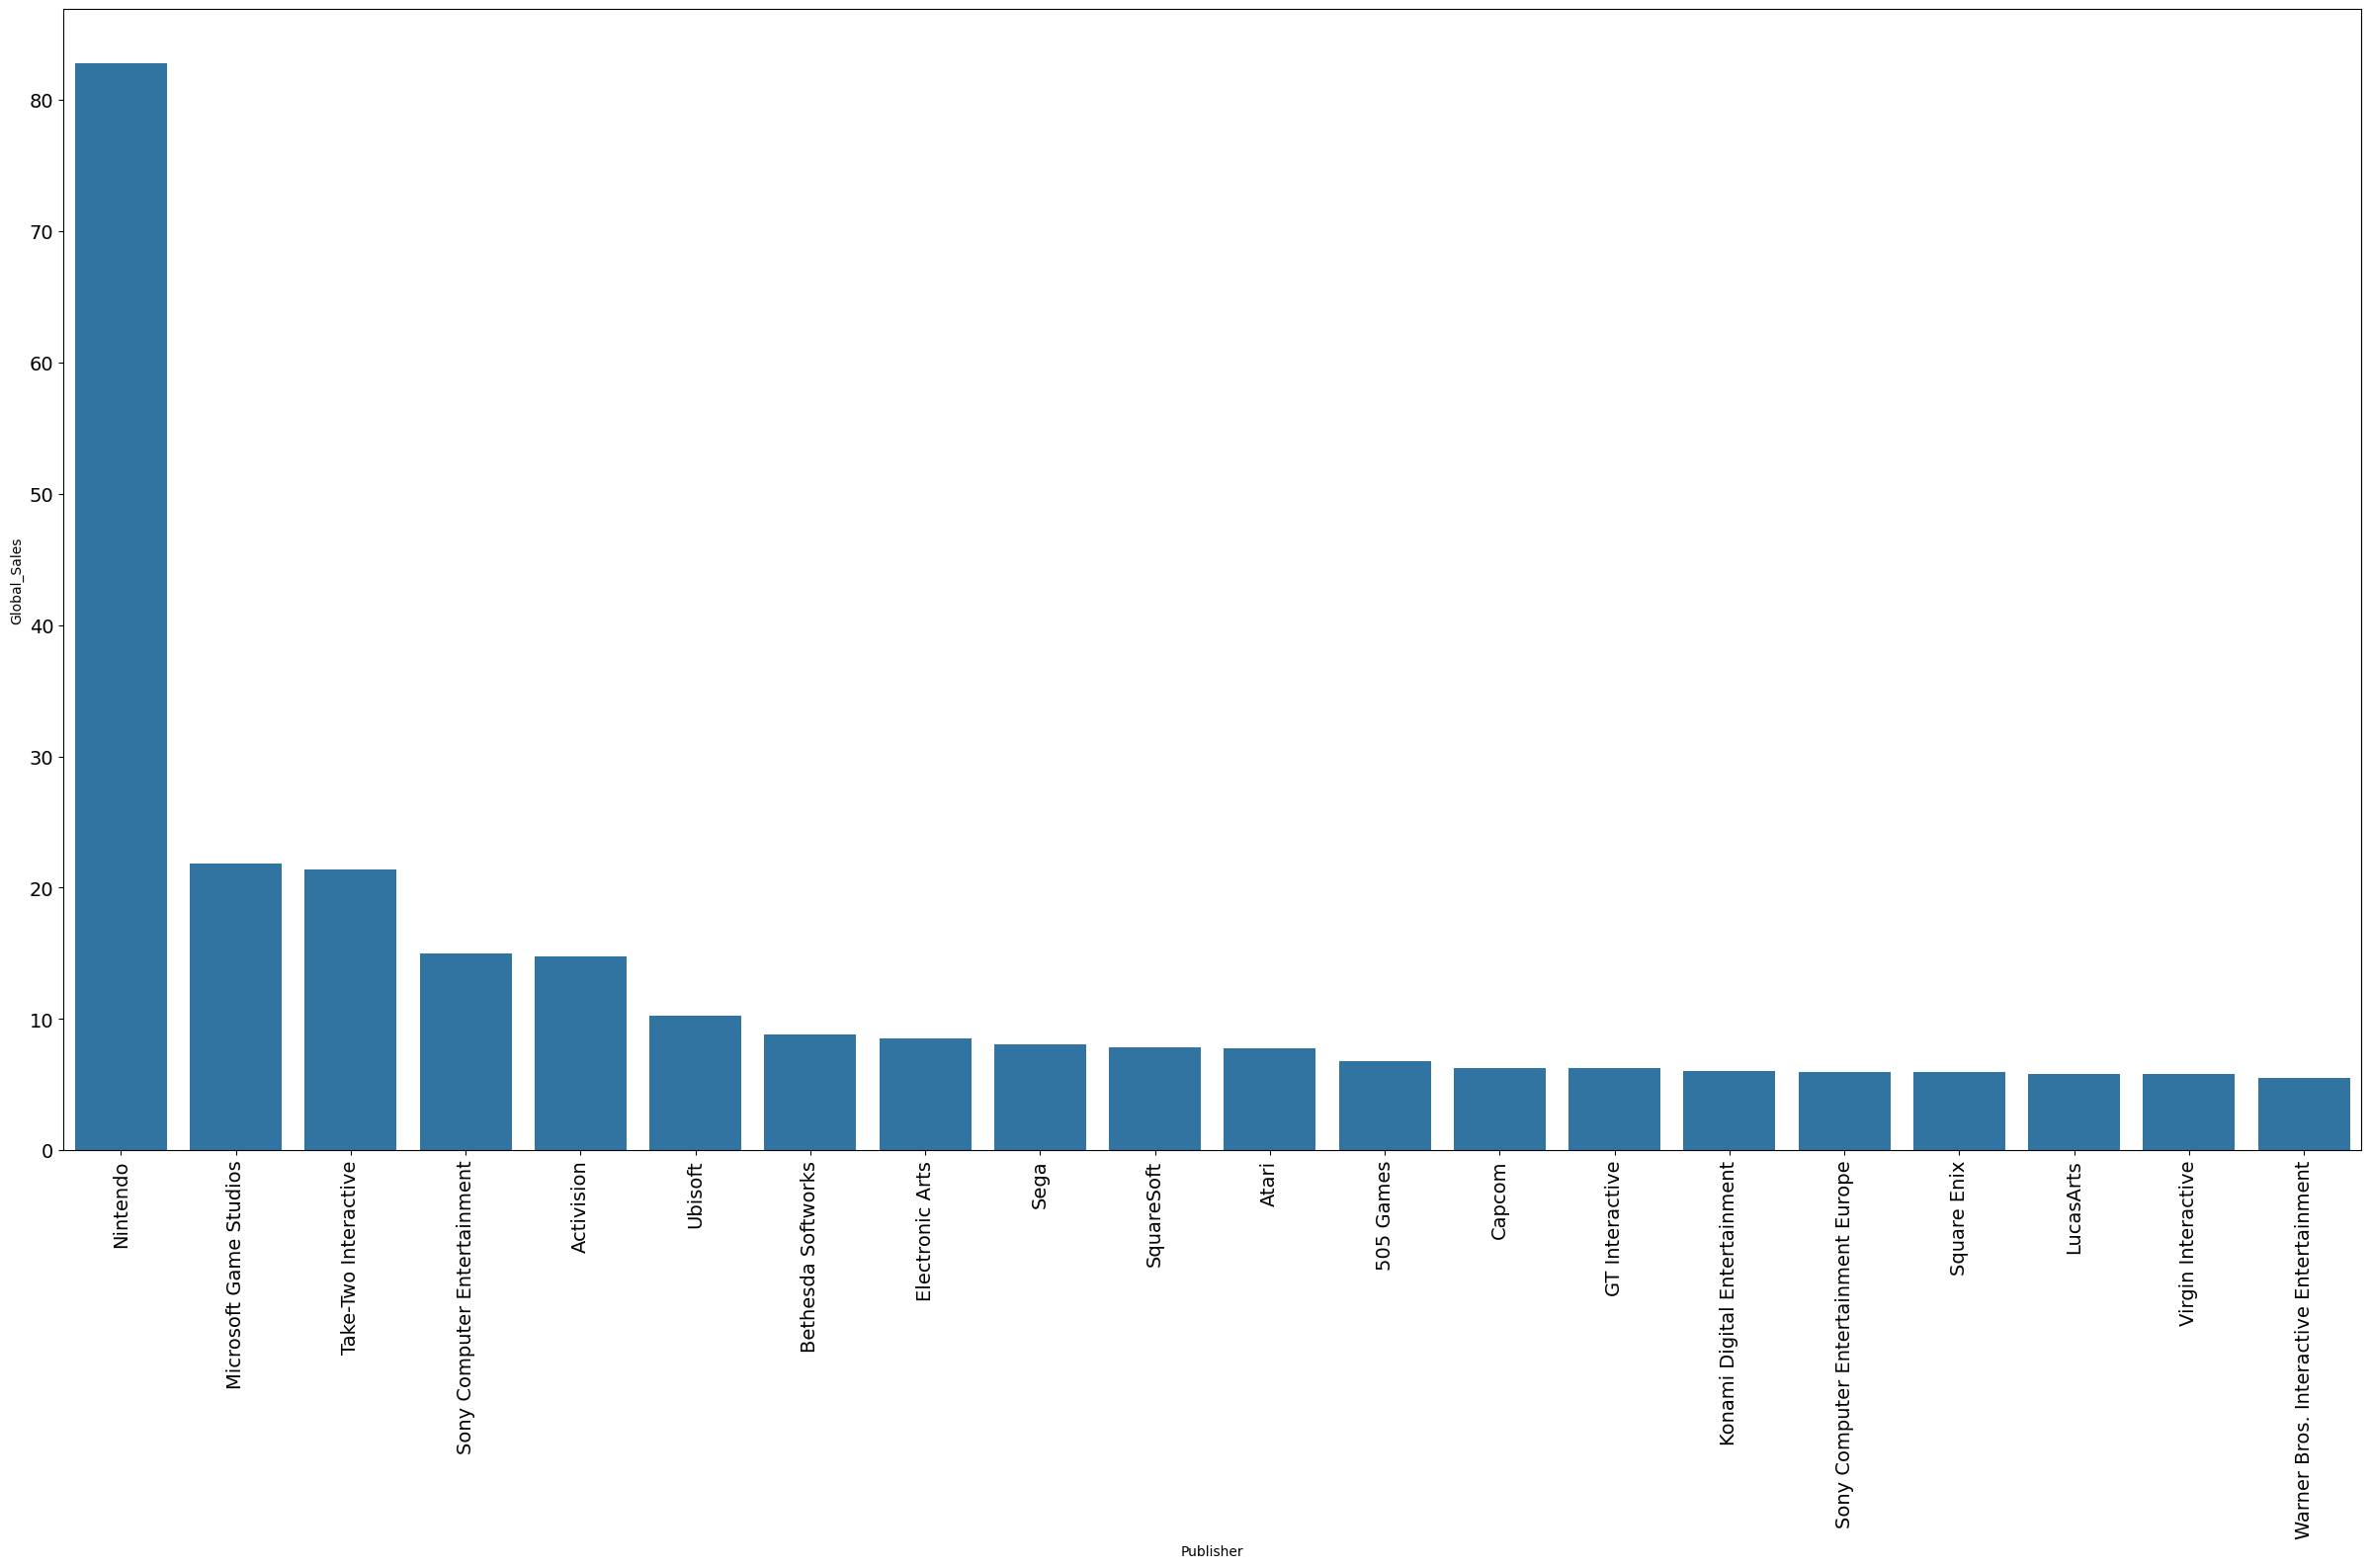

In [16]:
plt.figure(figsize=(30, 15))
sns.barplot(x='Publisher', y='Global_Sales', data=unique_data_pair)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

<Axes: >

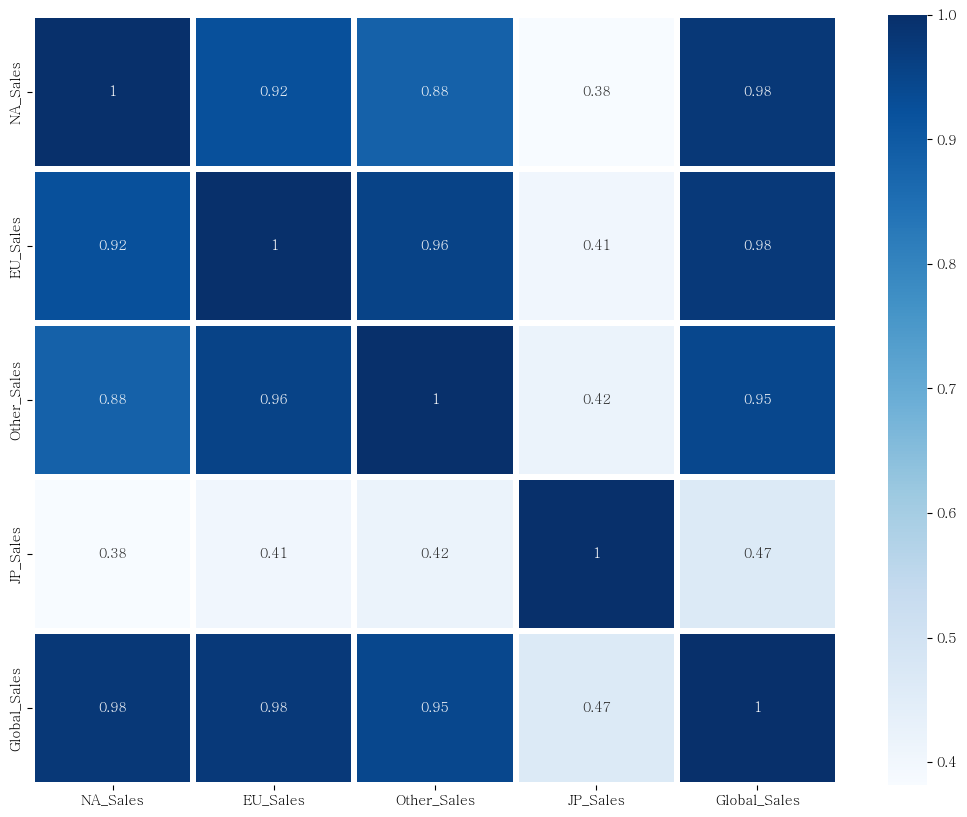

In [36]:
numeric_data = unique_data_pair.select_dtypes(include=['number'])
plt.figure(figsize=(13,10))
plt.rc('font', family='Batang')
sns.heatmap(numeric_data.corr(), cmap = "Blues", annot=True, linewidth=3)

## 상위 20개의 퍼블리셔에 대한 장르별 게임 개수

In [6]:
publisher_genre_crosstab = pd.crosstab(data["Publisher"], data['Genre'])
top_20_publishers = publisher_genre_crosstab.sum(axis=1).sort_values(ascending=False).head(20)

# top_20_publishers = publisher_genre_crosstab.groupby(by=['Publisher']).sum(axis=1).sort_values(ascending=False)
# top_20_publishers = publisher_genre_crosstab.groupby(level='Publisher').sum().sum(axis=1).sort_values(ascending=False).head(20)
# 상위 20개의 퍼블리셔에 대한 장르별 데이터 추출
publisher_genre_top_20 = publisher_genre_crosstab.loc[top_20_publishers.index]

publisher_genre_top_20



Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Publisher,,,,,,,,,,,,
Electronic Arts,183,13,39,46,16,7,159,35,139,116,561,37
Activision,310,25,7,103,60,7,74,41,159,23,144,22
Namco Bandai Games,248,58,134,97,19,20,27,151,37,29,51,61
Ubisoft,193,59,19,151,70,24,52,41,92,119,72,29
Konami Digital Entertainment,148,53,20,77,40,10,13,37,40,86,280,28
THQ,194,47,71,66,85,17,101,8,36,27,31,32
Nintendo,79,35,18,100,112,74,37,106,26,29,55,32
Sony Computer Entertainment,90,41,30,128,66,12,65,49,51,15,124,12
Sega,101,31,37,62,52,22,48,64,40,12,135,35


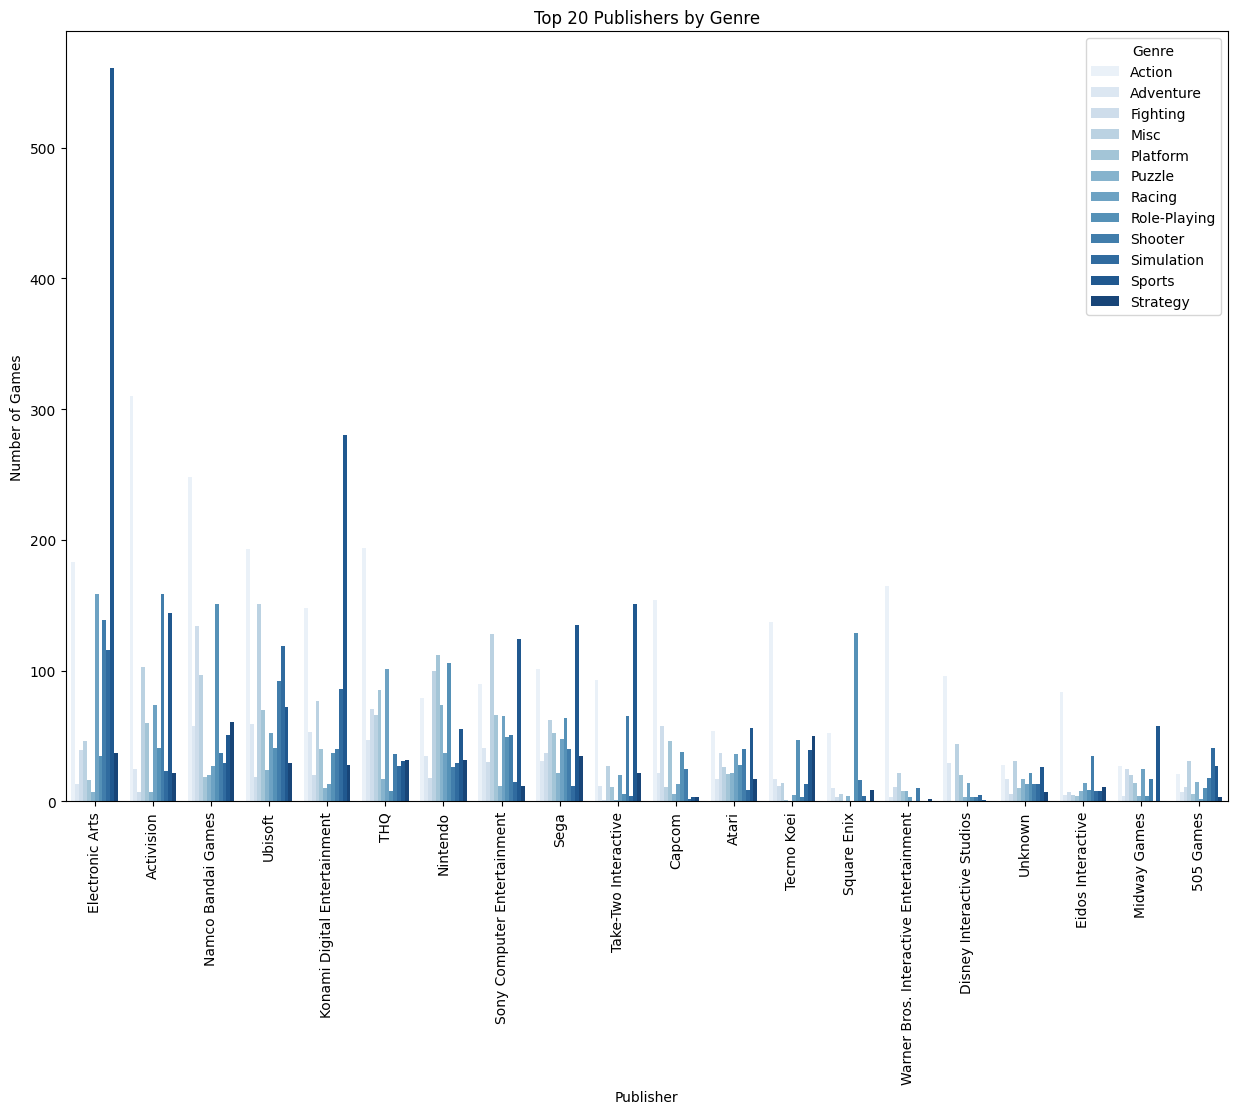

In [7]:
publisher_genre_melted = publisher_genre_top_20.reset_index().melt(id_vars='Publisher', var_name='Genre', value_name='Count')
publisher_genre_melted = publisher_genre_melted
plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Count', hue='Genre', data=publisher_genre_melted, palette='Blues')
plt.title('Top 20 Publishers by Genre')
plt.xlabel('Publisher')
plt.ylabel('Number of Games')
plt.xticks(rotation=90)
plt.show()

In [6]:
Publisher_Global_Sales =  pd.crosstab(sale_pbl["Publisher"], sale_pbl['Global_Sales'])
Publisher_Global_Sales

Global_Sales,69.85,82.14,87.34,98.98,119.96,145.18,153.89,157.22,200.89,245.79,254.09,272.99,283.64,340.77,399.54,474.72,607.50,727.46,1110.32,1786.56
Publisher,,,,,,,,,,,,,,,,,,,,
Activision,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Atari,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Bethesda Softworks,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Capcom,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Disney Interactive Studios,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Eidos Interactive,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Electronic Arts,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
Konami Digital Entertainment,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
LucasArts,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 상위 10 퍼블리셔의 매출 상관관계 (2000 ~ 2016)

In [24]:

year_publisher_sales = data.pivot_table(values='Global_Sales', index='Year', columns='Publisher', aggfunc='sum', fill_value=0)
top_10_publishers = year_publisher_sales.sum(axis=0).sort_values(ascending=False).head(10).index
filtered_year = year_publisher_sales[(year_publisher_sales.index >= 2000) & (year_publisher_sales.index <= 2016)]
filtered_top_10_publishers_with_year = filtered_year[top_10_publishers]
# 결과 출력
print(filtered_top_10_publishers_with_year)


Publisher  Nintendo  Electronic Arts  Activision  Sony Computer Entertainment  \
Year                                                                            
2000.0        34.05            25.13       14.48                        21.69   
2001.0        45.37            45.12       18.59                        43.29   
2002.0        48.31            73.01       25.94                        25.85   
2003.0        38.14            69.83       21.38                        24.32   
2004.0        60.65            67.33       39.23                        35.16   
2005.0       127.47            67.01       35.39                        26.38   
2006.0       205.61            58.41       17.40                        33.81   
2007.0       104.18            71.33       63.57                        37.54   
2008.0        91.22            84.12       67.41                        26.64   
2009.0       128.89            86.20       78.06                        36.53   
2010.0        61.07         

<Axes: xlabel='Publisher', ylabel='Publisher'>

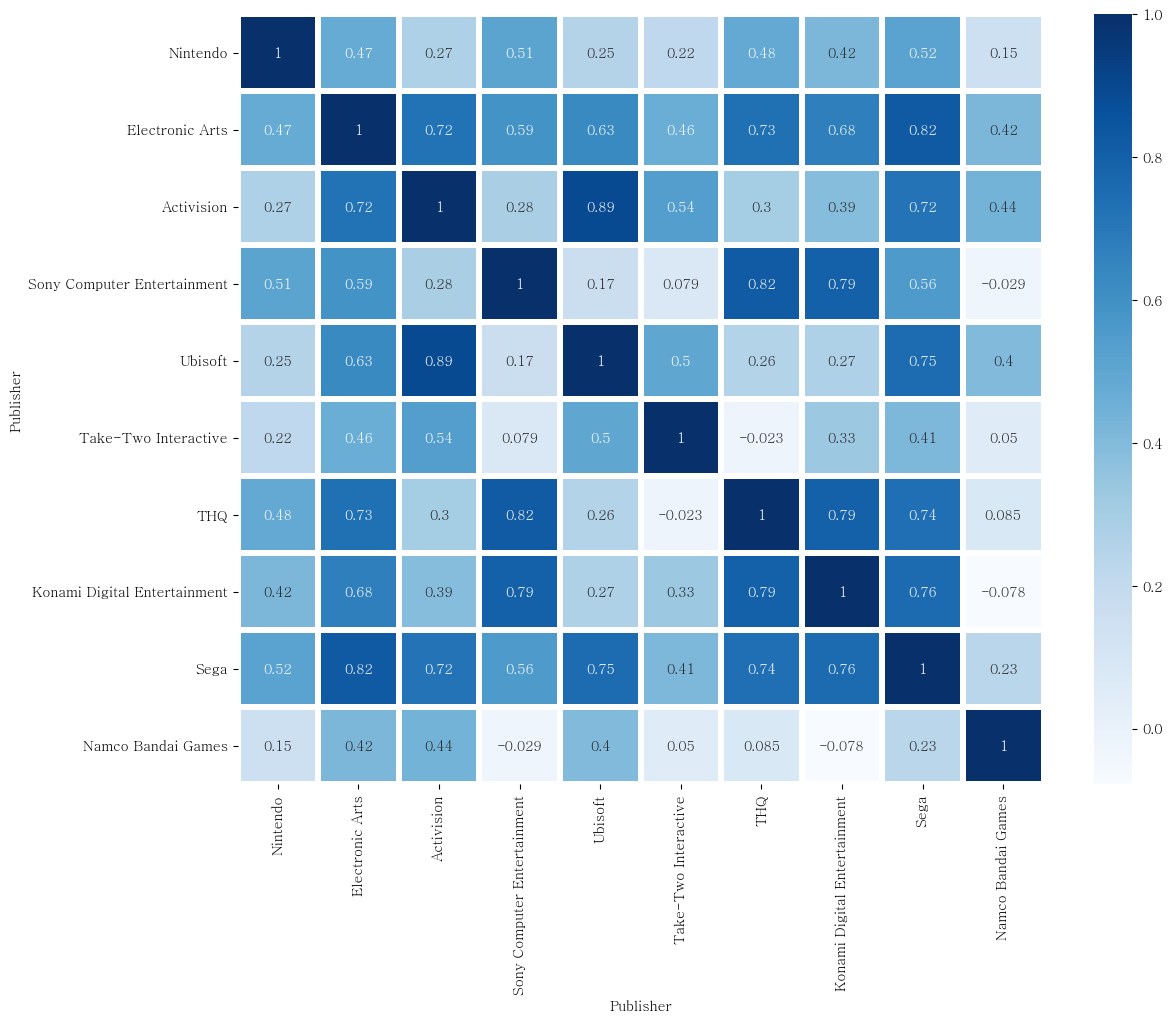

In [25]:
plt.figure(figsize=(13,10))
plt.rc('font', family='Batang')
sns.heatmap(filtered_top_10_publishers_with_year.corr(), cmap = "Blues", annot=True, linewidth=3)